In [1]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import os
import random
from shutil import copyfile

## **Training a convnet from scratch on a small dataset**
The relevance of deep learning for small-data problems

Downloading the data

-- from Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aliaffanyaqoob","key":"1a259d7b06dd63f22450f71186b96216"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 93% 125M/134M [00:01<00:00, 100MB/s]
100% 134M/134M [00:01<00:00, 74.8MB/s]


In [5]:
!unzip -qq /content/multiclass-weather-dataset.zip


In [6]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)
# print(file_count)

['test.csv', 'sunrise', 'shine', 'cloudy', 'alien_test', 'rainy', 'foggy']


In [7]:
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

In [8]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders
# (cloud, folly, rainy, shine, sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

#Under validation folder create five folders
# (cloud, folly, rainy, shine, sunrise)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'foggy')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)

In [9]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [10]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [11]:
split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

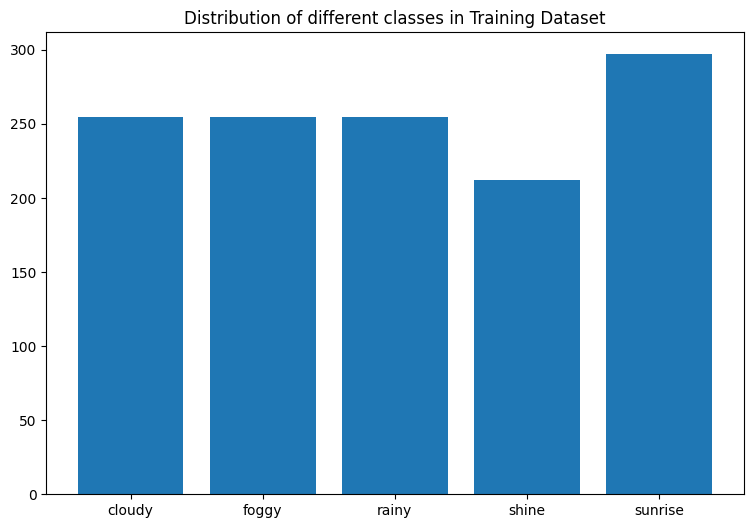

In [12]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [13]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print(f'Training {i} images are: '+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


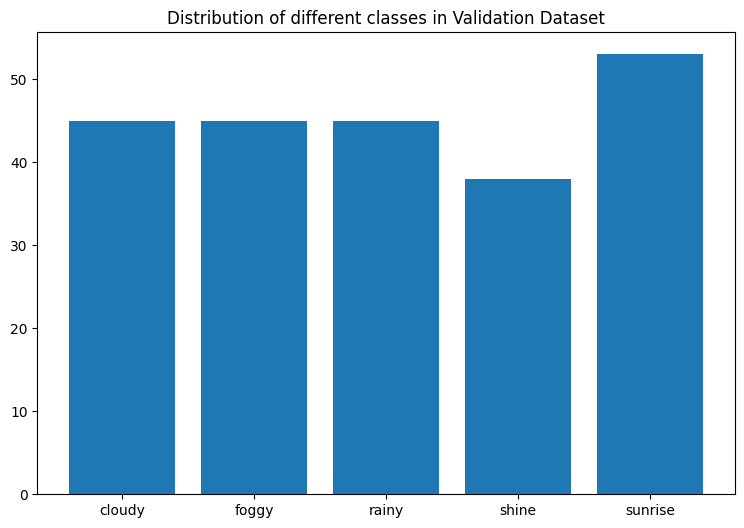

In [14]:

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [15]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print(f'Validation {i} images are: '+str(len(os.listdir('/content/weather-data/validation/'+i+'/'))))

Validation cloudy images are: 45
Validation foggy images are: 45
Validation rainy images are: 45
Validation shine images are: 38
Validation sunrise images are: 53


In [16]:
img_width=256; img_height=256
batch_size=16

In [17]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)


In [18]:

TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [19]:

VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [20]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [21]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [22]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
80/80 [==============================] - ETA: 0s - loss: 1.4448 - accuracy: 0.3383
Epoch 1: val_accuracy improved from -inf to 0.39823, saving model to /content/CNN_aug_best_weights.h5
80/80 [==============================] - 23s 125ms/step - loss: 1.4448 - accuracy: 0.3383 - val_loss: 1.2843 - val_accuracy: 0.3982
Epoch 2/30
80/80 [==============================] - ETA: 0s - loss: 1.2457 - accuracy: 0.3987
Epoch 2: val_accuracy improved from 0.39823 to 0.40265, saving model to /content/CNN_aug_best_weights.h5
80/80 [==============================] - 7s 93ms/step - loss: 1.2457 - accuracy: 0.3987 - val_loss: 1.1500 - val_accuracy: 0.4027
Epoch 3/30
80/80 [==============================] - ETA: 0s - loss: 1.1157 - accuracy: 0.4859
Epoch 3: val_accuracy improved from 0.40265 to 0.54867, saving model to /content/CNN_aug_best_weights.h5
80/80 [==============================] - 9s 112ms/step - loss: 1.1157 - accuracy: 0.4859 - val_loss: 0.9578 - val_accuracy: 0.5487
Epoch 4/30
80

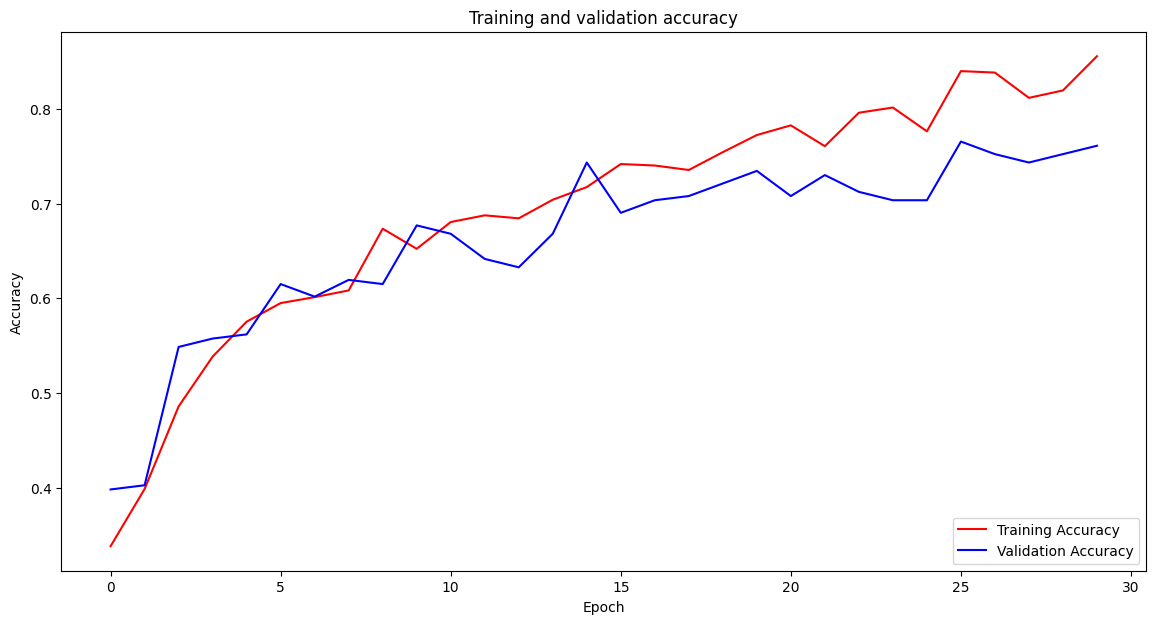

In [23]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

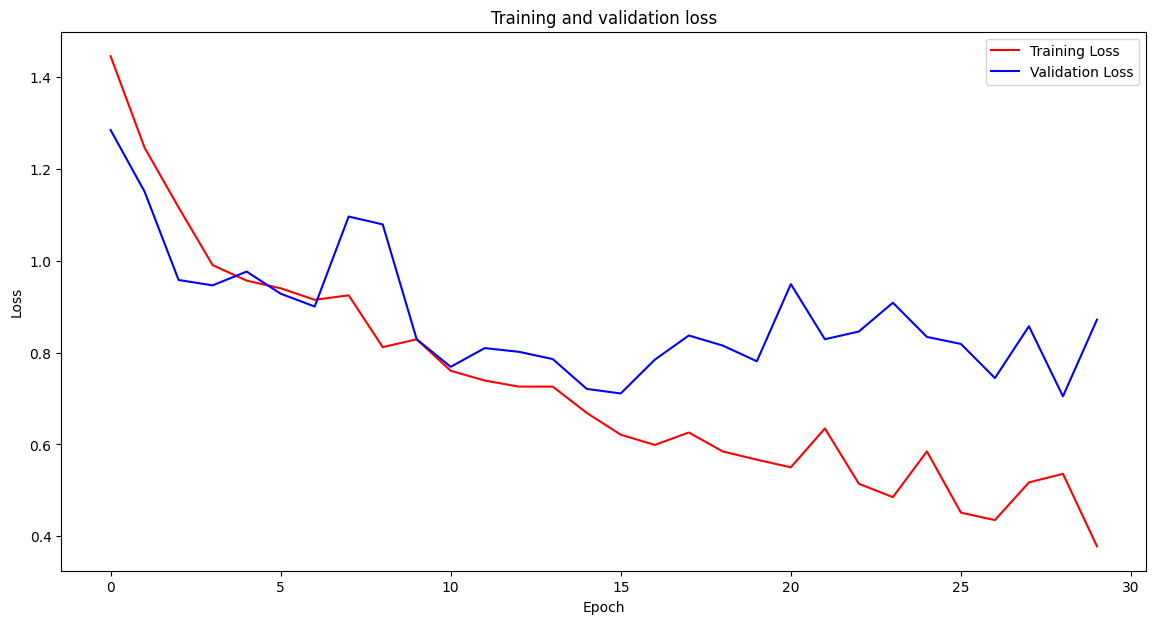

In [24]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

## **Data Augumentation**

In [25]:
train_datagen_aug = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=30,
    zoom_range=0.4,
    horizontal_flip=True,
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformations
    brightness_range=[0.5, 1.5],  # Random brightness adjustment
    channel_shift_range=50.0  # Randomly shift colors in each channel
)

train_generator_aug = train_datagen_aug.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [26]:
validation_datagen_aug = ImageDataGenerator(rescale = 1/255.0)

validation_generator_aug = validation_datagen_aug.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [27]:
model_aug = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model_aug.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 58, 58, 64)       

In [28]:
model_aug.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [29]:
history_aug = model_aug.fit_generator(train_generator_aug,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator_aug,
                              callbacks = [best_model]
                              )

Epoch 1/30
80/80 [==============================] - ETA: 0s - loss: 1.6636 - accuracy: 0.2708
Epoch 1: val_accuracy did not improve from 0.76549
80/80 [==============================] - 34s 367ms/step - loss: 1.6636 - accuracy: 0.2708 - val_loss: 1.5511 - val_accuracy: 0.2788
Epoch 2/30
80/80 [==============================] - ETA: 0s - loss: 1.4092 - accuracy: 0.3524
Epoch 2: val_accuracy did not improve from 0.76549
80/80 [==============================] - 30s 375ms/step - loss: 1.4092 - accuracy: 0.3524 - val_loss: 2.3276 - val_accuracy: 0.4336
Epoch 3/30
80/80 [==============================] - ETA: 0s - loss: 1.3795 - accuracy: 0.4105
Epoch 3: val_accuracy did not improve from 0.76549
80/80 [==============================] - 30s 371ms/step - loss: 1.3795 - accuracy: 0.4105 - val_loss: 1.2529 - val_accuracy: 0.5265
Epoch 4/30
80/80 [==============================] - ETA: 0s - loss: 1.2213 - accuracy: 0.4639
Epoch 4: val_accuracy did not improve from 0.76549
80/80 [=================

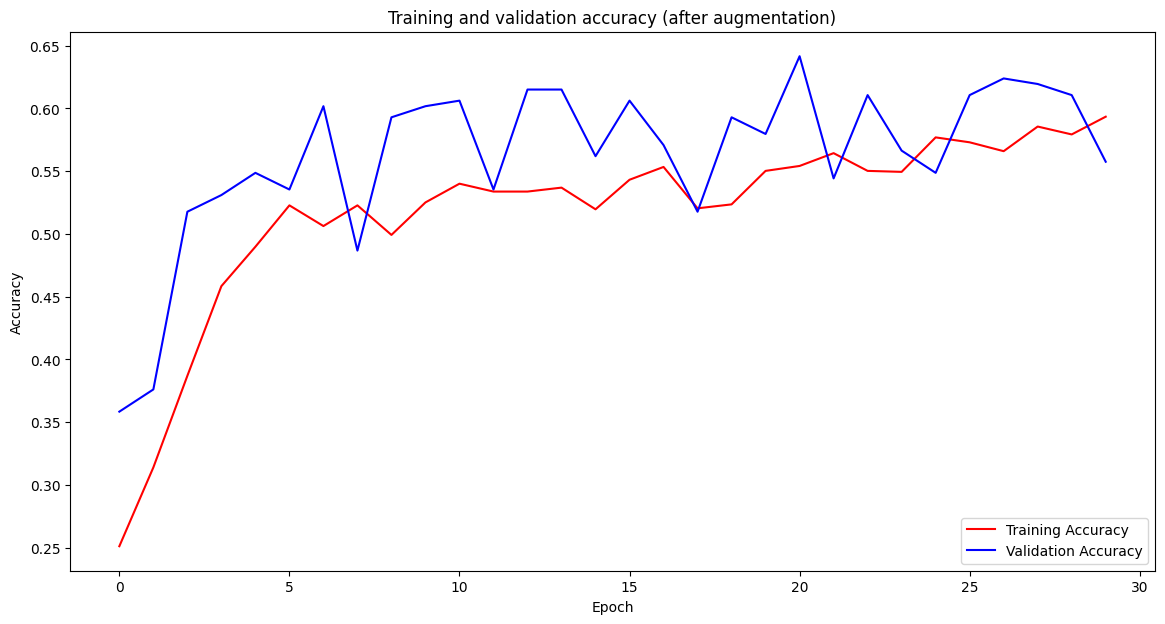

In [ ]:
acc=history_aug.history['accuracy']
val_acc=history_aug.history['val_accuracy']
loss=history_aug.history['loss']
val_loss=history_aug.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy (after augmentation)')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

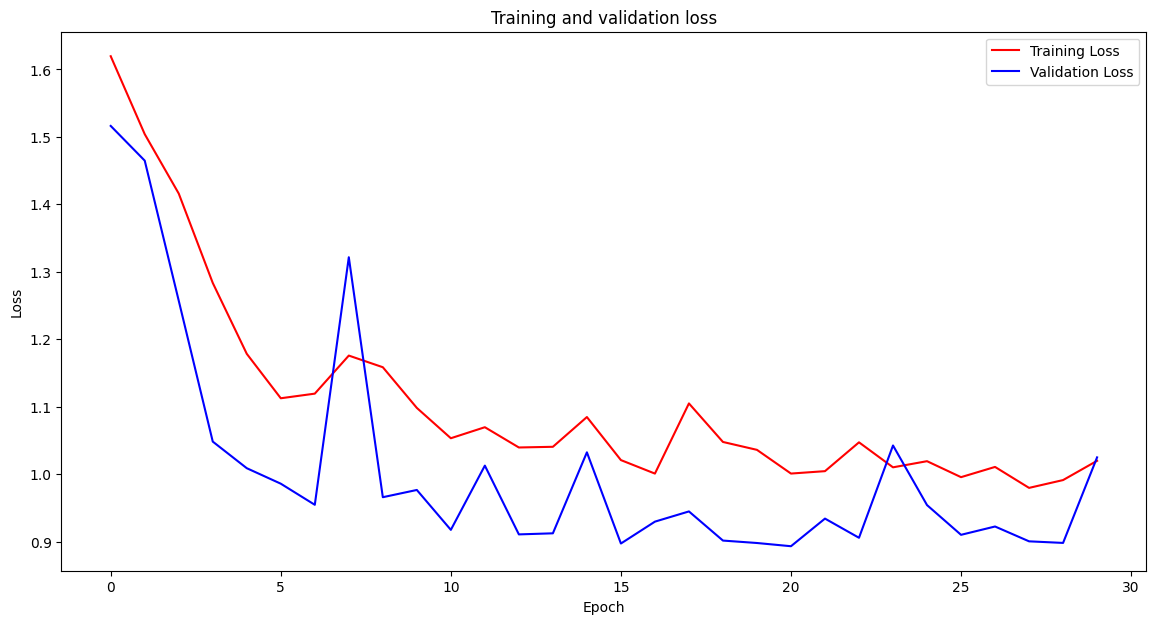

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

**TESTING**

In [32]:
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

1/1 [==============================] - 0s 115ms/step


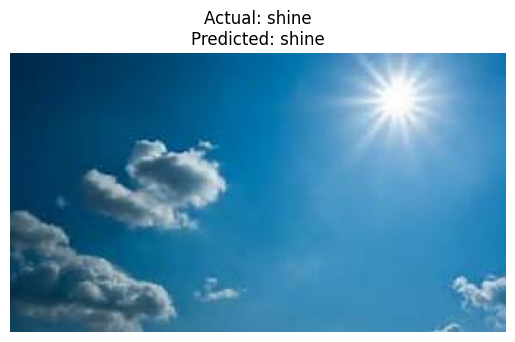

1/1 [==============================] - 0s 20ms/step


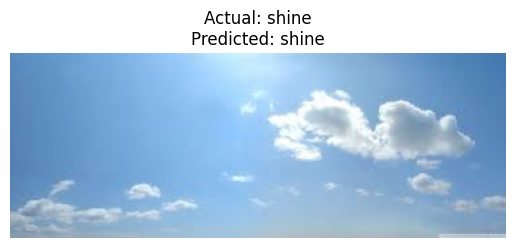

1/1 [==============================] - 0s 19ms/step


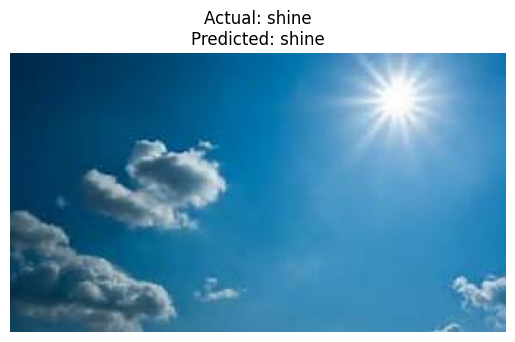

1/1 [==============================] - 0s 19ms/step


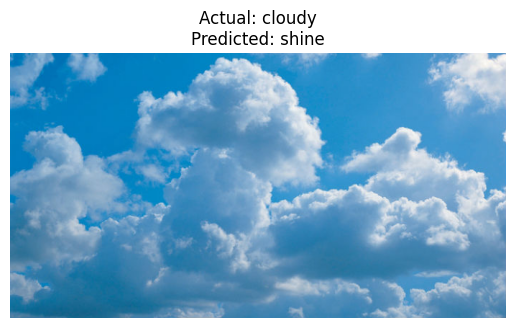

1/1 [==============================] - 0s 19ms/step


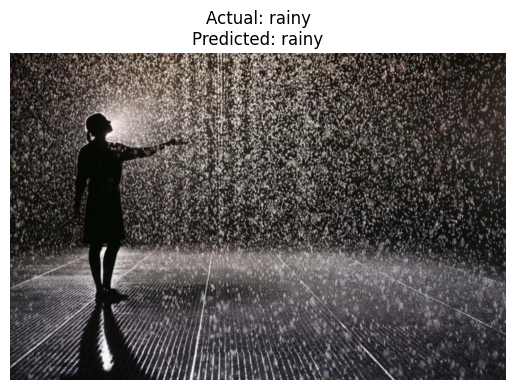

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import load_model
from keras.preprocessing import image  # Add this import statement

# Load the best model
best_model = load_model('/content/CNN_aug_best_weights.h5')

# Path to the test dataset
test_dir = '/content/dataset/alien_test/'

# Image classes
classes = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

# Function to preprocess and predict a random image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_random_image(model, test_directory, classes):
    # Get a random class
    random_class = np.random.choice(classes)

    # Get a random image from the class
    random_image_path = np.random.choice(os.listdir(os.path.join(test_directory, random_class)))

    # Preprocess the image
    img_path = os.path.join(test_directory, random_class, random_image_path)
    img = preprocess_image(img_path)

    # Make a prediction
    prediction = model.predict(img)
    predicted_class = classes[np.argmax(prediction)]

    # Display the image and prediction
    plt.imshow(plt.imread(img_path))
    plt.title(f'Actual: {random_class}\nPredicted: {predicted_class}')
    plt.axis('off')
    plt.show()

# Visualize multiple random images and predictions
for _ in range(5):  # You can change the number of images to display
    predict_random_image(best_model, test_dir, classes)


## **SUMMARY**

Test dataset containing previously unseen images.

Model Performance: The model achieved an accuracy of approx 80% (4 correct predictions out of 5).



In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
!pip install nbconvert

In [40]:
!apt-get install texlive-xetex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-ja

In [44]:
from nbconvert import PDFExporter
import nbformat



# Open the notebook file
notebook_file = '/content/drive/MyDrive/Colab Notebooks/Assignment_2_(Ali_Affan_Yaqoob).ipynb'
with open(notebook_file, 'r', encoding='utf-8') as f:
    notebook_content = nbformat.read(f, as_version=4)

# Initialize PDF export
pdf_exporter = PDFExporter()
pdf_data, resources = pdf_exporter.from_notebook_node(notebook_content)

# Save the PDF
pdf_file_path = '/content/drive/MyDrive/Assignment 2 - Multiclass classification using CNN (Ali Affan Yaqoob).pdf'
with open(pdf_file_path, 'wb') as f:
    f.write(pdf_data)